In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

#open the file
datapath='/Users/rachellee/Desktop/research/references/'
filename='flux_table_70um.txt'
data=np.loadtxt(datapath+filename)

#number is coloumn 0, flux is column 25
number=data[:,0]
flux=data[:,25]

In [2]:
#remove zeros in the flux
flux_new=[]
for i in range(len(flux)):
    if flux[i]!=0:
        flux_new.append(flux[i])

In [3]:
#calculate the mean of each time step
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]

## 1 bin

In [4]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts1(full_time,size,probability,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob=probability/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob=random.random()
                if prob>burst_prob:
                    burst[j,i]=burst[j,i]
                    L[j,i]=cluster_mag[j]
                    C[j,i]=0
                if prob<=burst_prob:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
    #find the fraction at a time
    burst_num=[]
    fraction_val=0
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True:
                fraction_val+=1
        burst_num.append(fraction_val)
        fraction_val=0
        
    return burst_total,burst_num,burst,L,C

In [5]:
cluster_size1000_1=1000
steps=t*cadence
burst1000_1=np.ones((cluster_size1000_1,steps))
L1000_1=np.zeros((cluster_size1000_1,steps))
C1000_1=np.zeros((cluster_size1000_1,steps))
prob1000_1=1/(100*30)

#1 bin
burst_total1000_1=[]
burst_num1000_1=[]
final_burst1000_1=[]
final_L1000_1=[]
final_C1000_1=[]

for i in range(run):
    print(i)
    burst1000_1=np.ones((cluster_size1000_1,steps))
    L1000_1=np.zeros((cluster_size1000_1,steps))
    C1000_1=np.zeros((cluster_size1000_1,steps))
    values1000_1=bursts1(t,1000,prob1000_1,L1000_1,burst1000_1,C1000_1)
    burst_total1000_1.append(values1000_1[0])
    burst_num1000_1.append(values1000_1[1])
    final_burst1000_1.append(values1000_1[2])
    final_L1000_1.append(values1000_1[3])
    final_C1000_1.append(values1000_1[4])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [6]:
#write output files
values1000_1bin_table=Table()
values1000_1bin_table['burst_total']=burst_total1000_1
values1000_1bin_table['burst_number']=burst_num1000_1  
ascii.write(values1000_1bin_table,'/Users/rachellee/Downloads/data/1000stars_only/values1000_1bin_2week',\
            format='ecsv',overwrite=True)

np.save('/Users/rachellee/Downloads/data/1000stars_only/burst1000_1.npy',final_burst1000_1)
np.save('/Users/rachellee/Downloads/data/1000stars_only/L1000_1.npy',final_L1000_1)
np.save('/Users/rachellee/Downloads/data/1000stars_only/C1000_1.npy',final_C1000_1)

In [7]:
cadence_num_bursts1000_1=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000_1.append(burst_num1000_1[i][j])

## 2 bin

In [8]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts2(full_time,size,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob1=random.random()
                if prob1<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
                elif prob1>burst_prob100:
                    prob2=random.random()
                    if prob2<=burst_prob40:
                        burst[j,i:(3*cadence)+i]=np.nan
                        L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                        C[j,i:(3*cadence)+i]=40
                    elif prob2>burst_prob40:
                        burst[j,i]=burst[j,i]
                        L[j,i]=cluster_mag[j]
                        C[j,i]=0                  

    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total40=0
    total100=0
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            if np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
    
        
    return burst_total,burst_total40,burst_total100,burst_num40,burst_num100,burst,L,C

In [9]:
cluster_size1000_2=1000
steps=t*cadence
burst1000_2=np.ones((cluster_size1000_2,steps))
L1000_2=np.zeros((cluster_size1000_2,steps))
C1000_2=np.zeros((cluster_size1000_2,steps))
prob1000_2_40=1/(40*6)
prob1000_2_100=1/(100*60)

#1 bin
burst_total1000_2=[]
burst_total1000_2_40=[]
burst_num1000_2_40=[]
burst_total1000_2_100=[]
burst_num1000_2_100=[]
final_burst1000_2=[]
final_L1000_2=[]
final_C1000_2=[]

for i in range(run):
    print(i)
    burst1000_2=np.ones((cluster_size1000_2,steps))
    L1000_2=np.zeros((cluster_size1000_2,steps))
    C1000_2=np.zeros((cluster_size1000_2,steps))
    values1000_2=bursts2(t,1000,prob1000_2_40,prob1000_2_100,L1000_2,burst1000_2,C1000_2)
    burst_total1000_2.append(values1000_2[0])
    burst_total1000_2_40.append(values1000_2[1])
    burst_total1000_2_100.append(values1000_2[2])
    burst_num1000_2_40.append(values1000_2[3])
    burst_num1000_2_100.append(values1000_2[4])
    final_burst1000_2.append(values1000_2[5])
    final_L1000_2.append(values1000_2[6])
    final_C1000_2.append(values1000_2[7])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [10]:
#burst_total,burst_total40,burst_total100,burst_num40,burst_num100

values1000_2bin_table=Table()
values1000_2bin_table['burst_total']=burst_total1000_2
values1000_2bin_table['burst_total40']=burst_total1000_2_40
values1000_2bin_table['burst_total100']=burst_total1000_2_100
values1000_2bin_table['burst_num40']=burst_num1000_2_40
values1000_2bin_table['burst_num100']=burst_num1000_2_100
    
ascii.write(values1000_2bin_table,'/Users/rachellee/Downloads/data/1000stars_only/values1000_2bin_2week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/1000stars_only/burst1000_2.npy',final_burst1000_2)
np.save('/Users/rachellee/Downloads/data/1000stars_only/L1000_2.npy',final_L1000_2)
np.save('/Users/rachellee/Downloads/data/1000stars_only/C1000_2.npy',final_C1000_2)

In [11]:
cadence_num_bursts1000_2_40=[]
cadence_num_bursts1000_2_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000_2_40.append(burst_num1000_2_40[i][j])
        cadence_num_bursts1000_2_100.append(burst_num1000_2_100[i][j])

## 3 bin

In [12]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts3(full_time,size,prob16,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob16=prob16/cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob1=random.random()
                if prob1<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
                elif prob1>burst_prob100:
                    prob2=random.random()
                    if prob2<=burst_prob40:
                        burst[j,i:(3*cadence)+i]=np.nan
                        L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                        C[j,i:(3*cadence)+i]=40
                    elif prob2>burst_prob40:
                        prob3=random.random()
                        if prob3<=burst_prob16:
                            burst[j,i:(1*cadence)+i]=np.nan
                            L[j,i:(1*cadence)+i]=cluster_mag[j]-3
                            C[j,i:(1*cadence)+i]=16
                        elif prob3>burst_prob16:
                            burst[j,i]=burst[j,i]
                            L[j,i]=cluster_mag[j]
                            C[j,i]=0  
                            
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total16=0
    total40=0
    total100=0
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==16:
                total16+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            if np.isnan(burst[j,i])==True and C[j,i]==16:
                frac_val16+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total16,burst_total40,burst_total100,burst_num16,burst_num40,burst_num100,burst,L,C

In [13]:
cluster_size1000_3=1000
steps=t*cadence
burst1000_3=np.ones((cluster_size1000_3,steps))
L1000_3=np.zeros((cluster_size1000_3,steps))
C1000_3=np.empty((cluster_size1000_3,steps))
prob1000_3_16=1/(16*3)
prob1000_3_40=1/(120*3)
prob1000_3_100=1/(300*30)

burst_total1000_3=[]
burst_total1000_3_16=[]
burst_num1000_3_16=[]
burst_total1000_3_40=[]
burst_num1000_3_40=[]
burst_total1000_3_100=[]
burst_num1000_3_100=[]
final_burst1000_3=[]
final_L1000_3=[]
final_C1000_3=[]

for i in range(run):
    print(i)
    burst1000_3=np.ones((cluster_size1000_3,steps))
    L1000_3=np.zeros((cluster_size1000_3,steps))
    C1000_3=np.zeros((cluster_size1000_3,steps))
    values1000_3=bursts3(t,1000,prob1000_3_16,prob1000_3_40,prob1000_3_100,L1000_3,burst1000_3,C1000_3)
    burst_total1000_3.append(values1000_3[0])
    burst_total1000_3_16.append(values1000_3[1])
    burst_total1000_3_40.append(values1000_3[2])
    burst_total1000_3_100.append(values1000_3[3])
    burst_num1000_3_16.append(values1000_3[4])
    burst_num1000_3_40.append(values1000_3[5])
    burst_num1000_3_100.append(values1000_3[6])
    final_burst1000_3.append(values1000_3[7])
    final_L1000_3.append(values1000_3[8])
    final_C1000_3.append(values1000_3[9])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [28]:
#burst_total,burst_total16,burst_total40,burst_total100,burst_num16,burst_num40,burst_num100

values1000_3bin_table=Table()
values1000_3bin_table['burst_total']=burst_total1000_3
values1000_3bin_table['burst_total16']=burst_total1000_3_16
values1000_3bin_table['burst_total40']=burst_total1000_3_40
values1000_3bin_table['burst_total100']=burst_total1000_3_100
values1000_3bin_table['burst_num16']=burst_num1000_3_16
values1000_3bin_table['burst_num40']=burst_num1000_3_40
values1000_3bin_table['burst_num100']=burst_num1000_3_100
    
ascii.write(values1000_3bin_table,'/Users/rachellee/Downloads/data/1000stars_only/values1000_3bin_2week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/1000stars_only/burst1000_3.npy',final_burst1000_3)
np.save('/Users/rachellee/Downloads/data/1000stars_only/L1000_3.npy',final_L1000_3)
np.save('/Users/rachellee/Downloads/data/1000stars_only/C1000_3.npy',final_C1000_3)

In [15]:
cadence_num_bursts1000_3_16=[]
cadence_num_bursts1000_3_40=[]
cadence_num_bursts1000_3_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000_3_16.append(burst_num1000_3_16[i][j])
        cadence_num_bursts1000_3_40.append(burst_num1000_3_40[i][j])
        cadence_num_bursts1000_3_100.append(burst_num1000_3_100[i][j])

## 4 bins

In [16]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts4(full_time,size,prob3,prob16,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob3=prob3/cadence
    burst_prob16=prob16/cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob1=random.random()
                if prob1<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=np.nan
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
                elif prob1>burst_prob100:
                    prob2=random.random()
                    if prob2<=burst_prob40:
                        burst[j,i:(3*cadence)+i]=np.nan
                        L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                        C[j,i:(3*cadence)+i]=40
                    elif prob2>burst_prob40:
                        prob3=random.random()
                        if prob3<=burst_prob16:
                            burst[j,i:(1*cadence)+i]=np.nan
                            L[j,i:(1*cadence)+i]=cluster_mag[j]-3
                            C[j,i:(1*cadence)+i]=16
                        elif prob3>burst_prob16:
                            prob4=random.random()
                            if prob4<=burst_prob3:
                                burst[j,i]=np.nan
                                L[j,i]=cluster_mag[j]-1.25
                                C[j,i]=3
                            elif prob4>burst_prob3:
                                burst[j,i]=burst[j,i]
                                L[j,i]=cluster_mag[j]
                                C[j,i]=0 
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total3=0
    total16=0
    total40=0
    total100=0
    burst_total3=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
            if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==3:
                total3+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==16:
                total16+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total3.append(total3)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num3=[]
    frac_val3=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
            if np.isnan(burst[j,i])==True and C[j,i]==3:
                frac_val3+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            elif np.isnan(burst[j,i])==True and C[j,i]==16:
                frac_val16+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            elif np.isnan(burst[j,i])==True and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif np.isnan(burst[j,i])==True and C[j,i]==100:
                frac_val100+=1
        burst_num3.append(frac_val3)
        frac_val3=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total3,burst_total16,burst_total40,burst_total100,burst_num3,burst_num16,\
burst_num40,burst_num100,burst,L,C

In [17]:
cluster_size1000_4=1000
steps=t*cadence
burst1000_4=np.ones((cluster_size1000_4,steps))
L1000_4=np.zeros((cluster_size1000_4,steps))
C1000_4=np.empty((cluster_size1000_4,steps))
prob1000_4_3=0.25/(3*0.04)
prob1000_4_16=0.25/(16*1)
prob1000_4_40=0.25/(40*3)
prob1000_4_100=0.25/(100*30)

burst_total1000_4=[]
burst_total1000_4_3=[]
burst_num1000_4_3=[]
burst_total1000_4_16=[]
burst_num1000_4_16=[]
burst_total1000_4_40=[]
burst_num1000_4_40=[]
burst_total1000_4_100=[]
burst_num1000_4_100=[]
final_burst1000_4=[]
final_L1000_4=[]
final_C1000_4=[]

for i in range(run):
    print(i)
    burst1000_4=np.ones((cluster_size1000_4,steps))
    L1000_4=np.zeros((cluster_size1000_4,steps))
    C1000_4=np.empty((cluster_size1000_4,steps))
    values1000_4=bursts4(t,1000,prob1000_4_3,prob1000_4_16,prob1000_4_40,prob1000_4_100,L1000_4,burst1000_4,C1000_4)
    burst_total1000_4.append(values1000_4[0])
    burst_total1000_4_3.append(values1000_4[1])
    burst_total1000_4_16.append(values1000_4[2])
    burst_total1000_4_40.append(values1000_4[3])
    burst_total1000_4_100.append(values1000_4[4])
    burst_num1000_4_3.append(values1000_4[5])
    burst_num1000_4_16.append(values1000_4[6])
    burst_num1000_4_40.append(values1000_4[7])
    burst_num1000_4_100.append(values1000_4[8])
    final_burst1000_4.append(values1000_4[9])
    final_L1000_4.append(values1000_4[10])
    final_C1000_4.append(values1000_4[11])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [18]:
#burst_total,burst_total6,burst_total16,burst_total40,burst_total100,burst_num2,burst_num16,burst_num40,burst_num100

values1000_4bin_table=Table()
values1000_4bin_table['burst_total']=burst_total1000_4
values1000_4bin_table['burst_total3']=burst_total1000_4_3
values1000_4bin_table['burst_total16']=burst_total1000_4_16
values1000_4bin_table['burst_total40']=burst_total1000_4_40
values1000_4bin_table['burst_total100']=burst_total1000_4_100
values1000_4bin_table['burst_num3']=burst_num1000_4_3
values1000_4bin_table['burst_num16']=burst_num1000_4_16
values1000_4bin_table['burst_num40']=burst_num1000_4_40
values1000_4bin_table['burst_num100']=burst_num1000_4_100
    
ascii.write(values1000_4bin_table,'/Users/rachellee/Downloads/data/1000stars_only/values1000_4bin_2_week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/1000stars_only/burst1000_4.npy',final_burst1000_4)
np.save('/Users/rachellee/Downloads/data/1000stars_only/L1000_4.npy',final_L1000_4)
np.save('/Users/rachellee/Downloads/data/1000stars_only/C1000_4.npy',final_C1000_4)

In [19]:
cadence_num_bursts1000_4_3=[]
cadence_num_bursts1000_4_16=[]
cadence_num_bursts1000_4_40=[]
cadence_num_bursts1000_4_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000_4_3.append(burst_num1000_4_3[i][j])        
        cadence_num_bursts1000_4_16.append(burst_num1000_4_16[i][j])
        cadence_num_bursts1000_4_40.append(burst_num1000_4_40[i][j])
        cadence_num_bursts1000_4_100.append(burst_num1000_4_100[i][j])

## 5 bins

In [20]:
run=50
t=300
cadence=26

#run it 50 times
#start with function
def bursts5(full_time,size,prob3,prob6,prob16,prob40,prob100,L_matrix,burst_matrix,change_matrix):
    cluster_flux=[]
    star=[]
    cluster_size=size
    for i in range(cluster_size):
        cluster_flux.append(random.choice(flux_new))
        star.append(i)
    cluster_mag=[]
    for i in range(len(cluster_flux)):
        mag=-2.5*np.log10(cluster_flux[i])
        cluster_mag.append(mag)
    #make multi dimensional array for burst prob 
    #let 1 be unburst and NaN be burst
    t=full_time #yrs
    cadence=26
    steps=t*cadence
    burst_prob3=prob3/cadence
    burst_prob6=prob6/cadence
    burst_prob16=prob16/cadence
    burst_prob40=prob40/cadence
    burst_prob100=prob100/cadence
    burst=burst_matrix
    L=L_matrix
    C=change_matrix
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==1:
                prob1=random.random()
                if prob1<=burst_prob100:
                    burst[j,i:(30*cadence)+i]=0
                    L[j,i:(30*cadence)+i]=cluster_mag[j]-5
                    C[j,i:(30*cadence)+i]=100
                elif prob1>burst_prob100:
                    prob2=random.random()
                    if prob2<=burst_prob40:
                        burst[j,i:(3*cadence)+i]=0
                        L[j,i:(3*cadence)+i]=cluster_mag[j]-4
                        C[j,i:(3*cadence)+i]=40
                    elif prob2>burst_prob40:
                        prob3=random.random()
                        if prob3<=burst_prob16:
                            burst[j,i:(1*cadence)+i]=0
                            L[j,i:(1*cadence)+i]=cluster_mag[j]-3
                            C[j,i:(1*cadence)+i]=16
                        elif prob3>burst_prob16:
                            prob4=random.random()
                            if prob4<=burst_prob6:
                                burst[j,i:(3*cadence)+i]=0
                                L[j,i:(3*cadence)+i]=cluster_mag[j]-2
                                C[j,i:(3*cadence)+i]=6
                            elif prob4>burst_prob6:
                                prob5=random.random()
                                if prob5<=burst_prob3:
                                    burst[j,i]=0
                                    L[j,i]=cluster_mag[j]-1.25
                                    C[j,i]=3
                                elif prob5>burst_prob3:
                                    burst[j,i]=burst[j,i]
                                    L[j,i]=cluster_mag[j]
                                    C[j,i]=0     
    #determine total number of bursts 
    total=0
    burst_total=[]
    for i in range(steps):
        for j in range(cluster_size):
            if burst[j,i]==0 and burst[j,i-1]==1:
                    total+=1
        burst_total.append(total)
        
    #determine the total number of 10 and 100x burst 
    total3=0
    total6=0
    total16=0
    total40=0
    total100=0
    burst_total3=[]
    burst_total6=[]
    burst_total16=[]
    burst_total40=[]
    burst_total100=[]
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-1.25:
            if burst[j,i]==0 and burst[j,i-1]==1 and C[j,i]==3:
                total3+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-2:
            elif burst[j,i]==0 and burst[j,i-1]==1 and C[j,i]==6:
                total6+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-3:
            elif burst[j,i]==0 and burst[j,i-1]==1 and C[j,i]==16:
                total16+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-4:
            elif burst[j,i]==0 and burst[j,i-1]==1 and C[j,i]==40:
                total40+=1
            #elif np.isnan(burst[j,i])==True and burst[j,i-1]==1 and L[j,i]-L[j,0]==-5.0:
            elif burst[j,i]==0 and burst[j,i-1]==1 and C[j,i]==100:
                total100+=1
        burst_total3.append(total3)
        burst_total6.append(total6)
        burst_total16.append(total16)
        burst_total40.append(total40)
        burst_total100.append(total100)

    #find the fraction at a time
    burst_num3=[]
    frac_val3=0
    burst_num6=[]
    frac_val6=0
    burst_num16=[]
    frac_val16=0
    burst_num40=[]
    frac_val40=0
    burst_num100=[]
    frac_val100=0
    for i in range(steps):
        for j in range(cluster_size):
            #if np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-1.25:
            if burst[j,i]==0 and C[j,i]==3:
                frac_val3+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-2:
            elif burst[j,i]==0 and C[j,i]==6:
                frac_val6+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-3:
            elif burst[j,i]==0 and C[j,i]==16:
                frac_val16+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-4:
            elif burst[j,i]==0 and C[j,i]==40:
                frac_val40+=1
            #elif np.isnan(burst[j,i])==True and L[j,i]-L[j,0]==-5.0:
            elif burst[j,i]==0 and C[j,i]==100:
                frac_val100+=1
        burst_num3.append(frac_val3)
        frac_val3=0
        burst_num6.append(frac_val6)
        frac_val6=0
        burst_num16.append(frac_val16)
        frac_val16=0
        burst_num40.append(frac_val40)
        frac_val40=0
        burst_num100.append(frac_val100)
        frac_val100=0  
        
    return burst_total,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,burst_num3,burst_num6,\
burst_num16,burst_num40,burst_num100,burst,L,C

In [21]:
cluster_size1000_5=1000
steps=t*cadence
burst1000_5=np.ones((cluster_size1000_5,steps))
L1000_5=np.zeros((cluster_size1000_5,steps))
C1000_5=np.zeros((cluster_size1000_5,steps))
prob1000_5_3=0.2/(3*0.04)
prob1000_5_6=0.2/(6*3)
prob1000_5_16=0.2/(16*1)
prob1000_5_40=0.2/(40*3)
prob1000_5_100=0.2/(100*30)

burst_total1000_5=[]
burst_total1000_5_3=[]
burst_num1000_5_3=[]
burst_total1000_5_6=[]
burst_num1000_5_6=[]
burst_total1000_5_16=[]
burst_num1000_5_16=[]
burst_total1000_5_40=[]
burst_num1000_5_40=[]
burst_total1000_5_100=[]
burst_num1000_5_100=[]
final_burst1000_5=[]
final_L1000_5=[]
final_C1000_5=[]

for i in range(run):
    print(i)
    burst1000_5=np.ones((cluster_size1000_5,steps))
    L1000_5=np.zeros((cluster_size1000_5,steps))
    C1000_5=np.zeros((cluster_size1000_5,steps))
    values1000_5=bursts5(t,1000,prob1000_5_3,prob1000_5_6,prob1000_5_16,prob1000_5_40,prob1000_5_100,\
                         L1000_5,burst1000_5,C1000_5)
    burst_total1000_5.append(values1000_5[0])
    burst_total1000_5_3.append(values1000_5[1])
    burst_total1000_5_6.append(values1000_5[2])
    burst_total1000_5_16.append(values1000_5[3])
    burst_total1000_5_40.append(values1000_5[4])
    burst_total1000_5_100.append(values1000_5[5])
    burst_num1000_5_3.append(values1000_5[6])
    burst_num1000_5_6.append(values1000_5[7])
    burst_num1000_5_16.append(values1000_5[8])
    burst_num1000_5_40.append(values1000_5[9])
    burst_num1000_5_100.append(values1000_5[10])
    final_burst1000_5.append(values1000_5[11])
    final_L1000_5.append(values1000_5[12])
    final_C1000_5.append(values1000_5[13])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [22]:
#burst_total,burst_total3,burst_total6,burst_total16,burst_total40,burst_total100,burst_num3,
#burst_num6,burst_num16,burst_num40,burst_num100

values1000_5bin_table=Table()
values1000_5bin_table['burst_total']=burst_total1000_5
values1000_5bin_table['burst_total3']=burst_total1000_5_3
values1000_5bin_table['burst_total6']=burst_total1000_5_6
values1000_5bin_table['burst_total16']=burst_total1000_5_16
values1000_5bin_table['burst_total40']=burst_total1000_5_40
values1000_5bin_table['burst_total100']=burst_total1000_5_100
values1000_5bin_table['burst_num3']=burst_num1000_5_3
values1000_5bin_table['burst_num6']=burst_num1000_5_6
values1000_5bin_table['burst_num16']=burst_num1000_5_16
values1000_5bin_table['burst_num40']=burst_num1000_5_40
values1000_5bin_table['burst_num100']=burst_num1000_5_100
    
ascii.write(values1000_5bin_table,'/Users/rachellee/Downloads/data/1000stars_only/values1000_5bin_2week',\
            format='ecsv',overwrite=True) 

np.save('/Users/rachellee/Downloads/data/1000stars_only/burst1000_5.npy',final_burst1000_5)
np.save('/Users/rachellee/Downloads/data/1000stars_only/L1000_5.npy',final_L1000_5)
np.save('/Users/rachellee/Downloads/data/1000stars_only/C1000_5.npy',final_C1000_5)

In [23]:
cadence_num_bursts1000_5_3=[]
cadence_num_bursts1000_5_6=[]
cadence_num_bursts1000_5_16=[]
cadence_num_bursts1000_5_40=[]
cadence_num_bursts1000_5_100=[]
for i in range(run):
    for j in t_list_cadence:
        cadence_num_bursts1000_5_3.append(burst_num1000_5_3[i][j])
        cadence_num_bursts1000_5_6.append(burst_num1000_5_6[i][j])        
        cadence_num_bursts1000_5_16.append(burst_num1000_5_16[i][j])
        cadence_num_bursts1000_5_40.append(burst_num1000_5_40[i][j])
        cadence_num_bursts1000_5_100.append(burst_num1000_5_100[i][j])

In [24]:
cadence_new3=[]
cadence_new6=[]
cadence_new16=[]
cadence_new40=[]
cadence_new100=[]
for i in range(len(cadence_num_bursts1000_5_3)):
    if cadence_num_bursts1000_5_3[i]!=0:
        cadence_new3.append(cadence_num_bursts1000_5_3[i])
        
for i in range(len(cadence_num_bursts1000_5_6)):
    if cadence_num_bursts1000_5_6[i]!=0:
        cadence_new6.append(cadence_num_bursts1000_5_6[i])
        
for i in range(len(cadence_num_bursts1000_5_16)):
    if cadence_num_bursts1000_5_16[i]!=0:
        cadence_new16.append(cadence_num_bursts1000_5_16[i])
        
for i in range(len(cadence_num_bursts1000_5_40)):
    if cadence_num_bursts1000_5_40[i]!=0:
        cadence_new40.append(cadence_num_bursts1000_5_40[i])
        
for i in range(len(cadence_num_bursts1000_5_100)):
    if cadence_num_bursts1000_5_100[i]!=0:
        cadence_new100.append(cadence_num_bursts1000_5_100[i])
        
data_5bin1000_log=[cadence_new3,cadence_new16,cadence_new40,cadence_new100]
data6_log=[cadence_new6]

<ipython-input-27-2a8018fcd731>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','0','20','40','60','80','100'])


[]

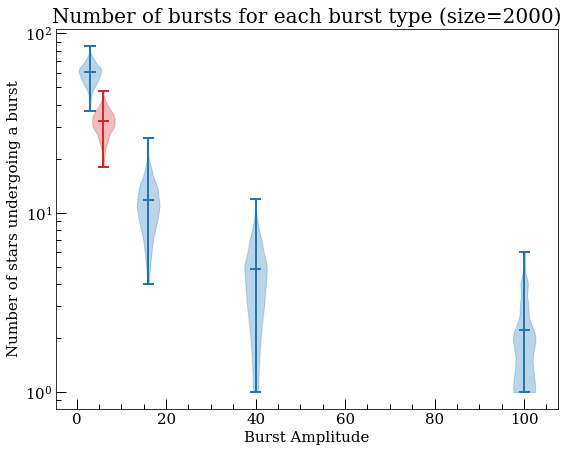

In [27]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v1=ax1.violinplot(data_5bin1000_log,positions=[0.3,1.6,4,10],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v1['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v1[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v6=ax1.violinplot(data6_log,positions=[0.6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','0','20','40','60','80','100'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=20)

#ax1.set_xlim(1,200)
plt.yscale('log')
#plt.xscale('log')

plt.plot()
#plt.savefig('/Users/rachellee/Desktop/research/figs/size1000/comp_1000_5bins_2week_log.jpeg',dpi=300,bbox_inches='tight')